In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Exporting Data

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1YL9yfiyL3cZJki5GnVpWqO2KnWqwFpwCAPos2ywpz5Q/edit#gid=1258473774'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
data = pd.read_csv(sheet_url_trf)
data

,Label,Isi,questionflag
0,Pertanyaan,"Sakit perut, kembung dan riwayat asam lambung ...",1
1,Pasien,saya irwan,1
2,Pembuka,Hallo dok,1
3,Usia,30th,1
4,Kapan,sebelumnya,1
...,...,...,...
399,Gejala,badan lemas sekali,1
400,Gejala,seperti tidak ada kehidupan,1
401,Penutup,Semoga bermanfaat,1
402,Penutup,Semoga bermanfaat,1


# Preprocess

## Removing Punctuation

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
data['Isi'] = data['Isi'].apply(remove_punctuation)
data.head(10)

,Label,Isi,questionflag
0,Pertanyaan,Sakit perut kembung dan riwayat asam lambung b...,1
1,Pasien,saya irwan,1
2,Pembuka,Hallo dok,1
3,Usia,30th,1
4,Kapan,sebelumnya,1
5,Gejala,sakit perut yang berulang,1
6,Gejala,perut kembung,1
7,Gejala,kentut bau,1
8,Penyakit,lambunggerd,1
9,Pasien,saya,1


## Removing Character

In [ ]:
data['Isi']=data['Isi'].str.replace('(?:\@|https?\://)\S+', '')
data['Isi']=data['Isi'].str.replace('[^\w\s]',' ')
#ilangin enter
data['Isi']=data['Isi'].str.lower()
#ilangin spasi berlebih
data['Isi'] = data['Isi'].replace('\s+', ' ', regex=True)
#ilangin simbol
data['Isi'] = data['Isi'].replace('\n',' ',regex=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


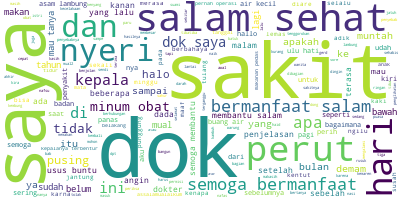

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data['Isi'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

Dapat terlihat bahwa masih terdapat beberapa kalimat stopword yang ada di dalam cloud words


## Removing Stopwords

In [ ]:
!pip install sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 22.7 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data['Isi'] = data['Isi'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data

,Label,Isi,questionflag
0,Pertanyaan,sakit perut kembung riwayat asam lambung menga...,1
1,Pasien,irwan,1
2,Pembuka,hallo dok,1
3,Usia,30th,1
4,Kapan,,1
...,...,...,...
399,Gejala,badan lemas,1
400,Gejala,kehidupan,1
401,Penutup,semoga bermanfaat,1
402,Penutup,semoga bermanfaat,1


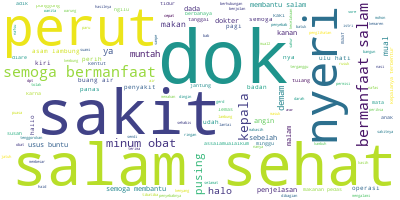

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data['Isi'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Stemming

In [ ]:
# create an object of stemming function
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
data['Isi'] = data['Isi'].apply(stemming)
data.head(10)

,Label,Isi,questionflag
0,Pertanyaan,sakit perut kembung riwayat asam lambung atas,1
1,Pasien,irwan,1
2,Pembuka,hallo dok,1
3,Usia,30th,1
4,Kapan,,1
5,Gejala,sakit perut ulang,1
6,Gejala,perut kembung,1
7,Gejala,kentut bau,1
8,Penyakit,lambunggerd,1
9,Pasien,,1


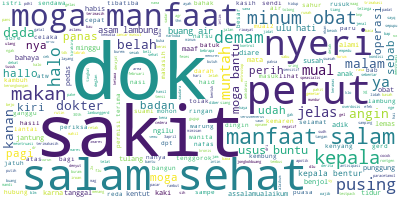

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data['Isi'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Analysis

In [ ]:
data

,Label,Isi,questionflag
0,Pertanyaan,sakit perut kembung riwayat asam lambung atas,1
1,Pasien,irwan,1
2,Pembuka,hallo dok,1
3,Usia,30th,1
4,Kapan,,1
...,...,...,...
399,Gejala,badan lemas,1
400,Gejala,hidup,1
401,Penutup,moga manfaat,1
402,Penutup,moga manfaat,1


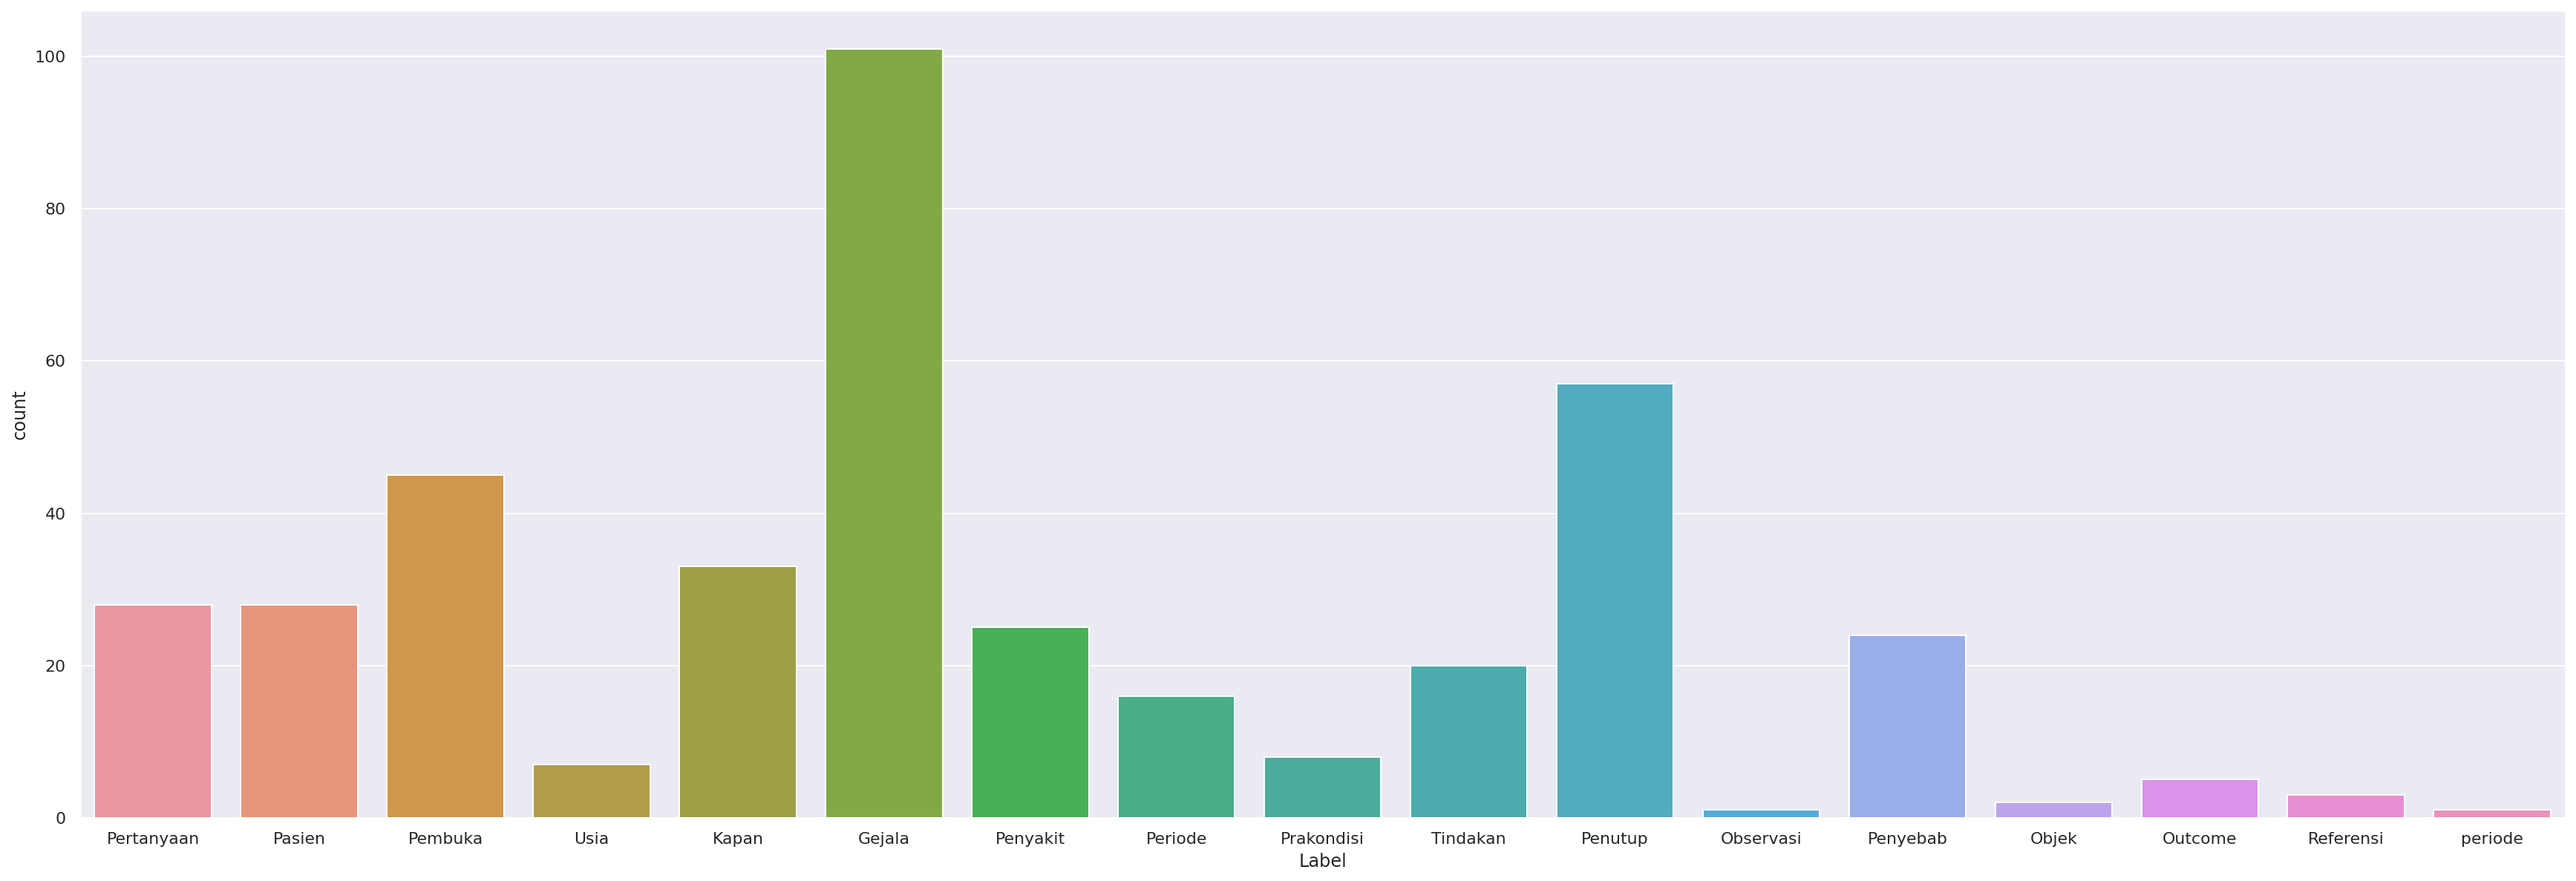

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(x="Label", data=data)

In [ ]:
data['Label']=data['Label'].str.lower()

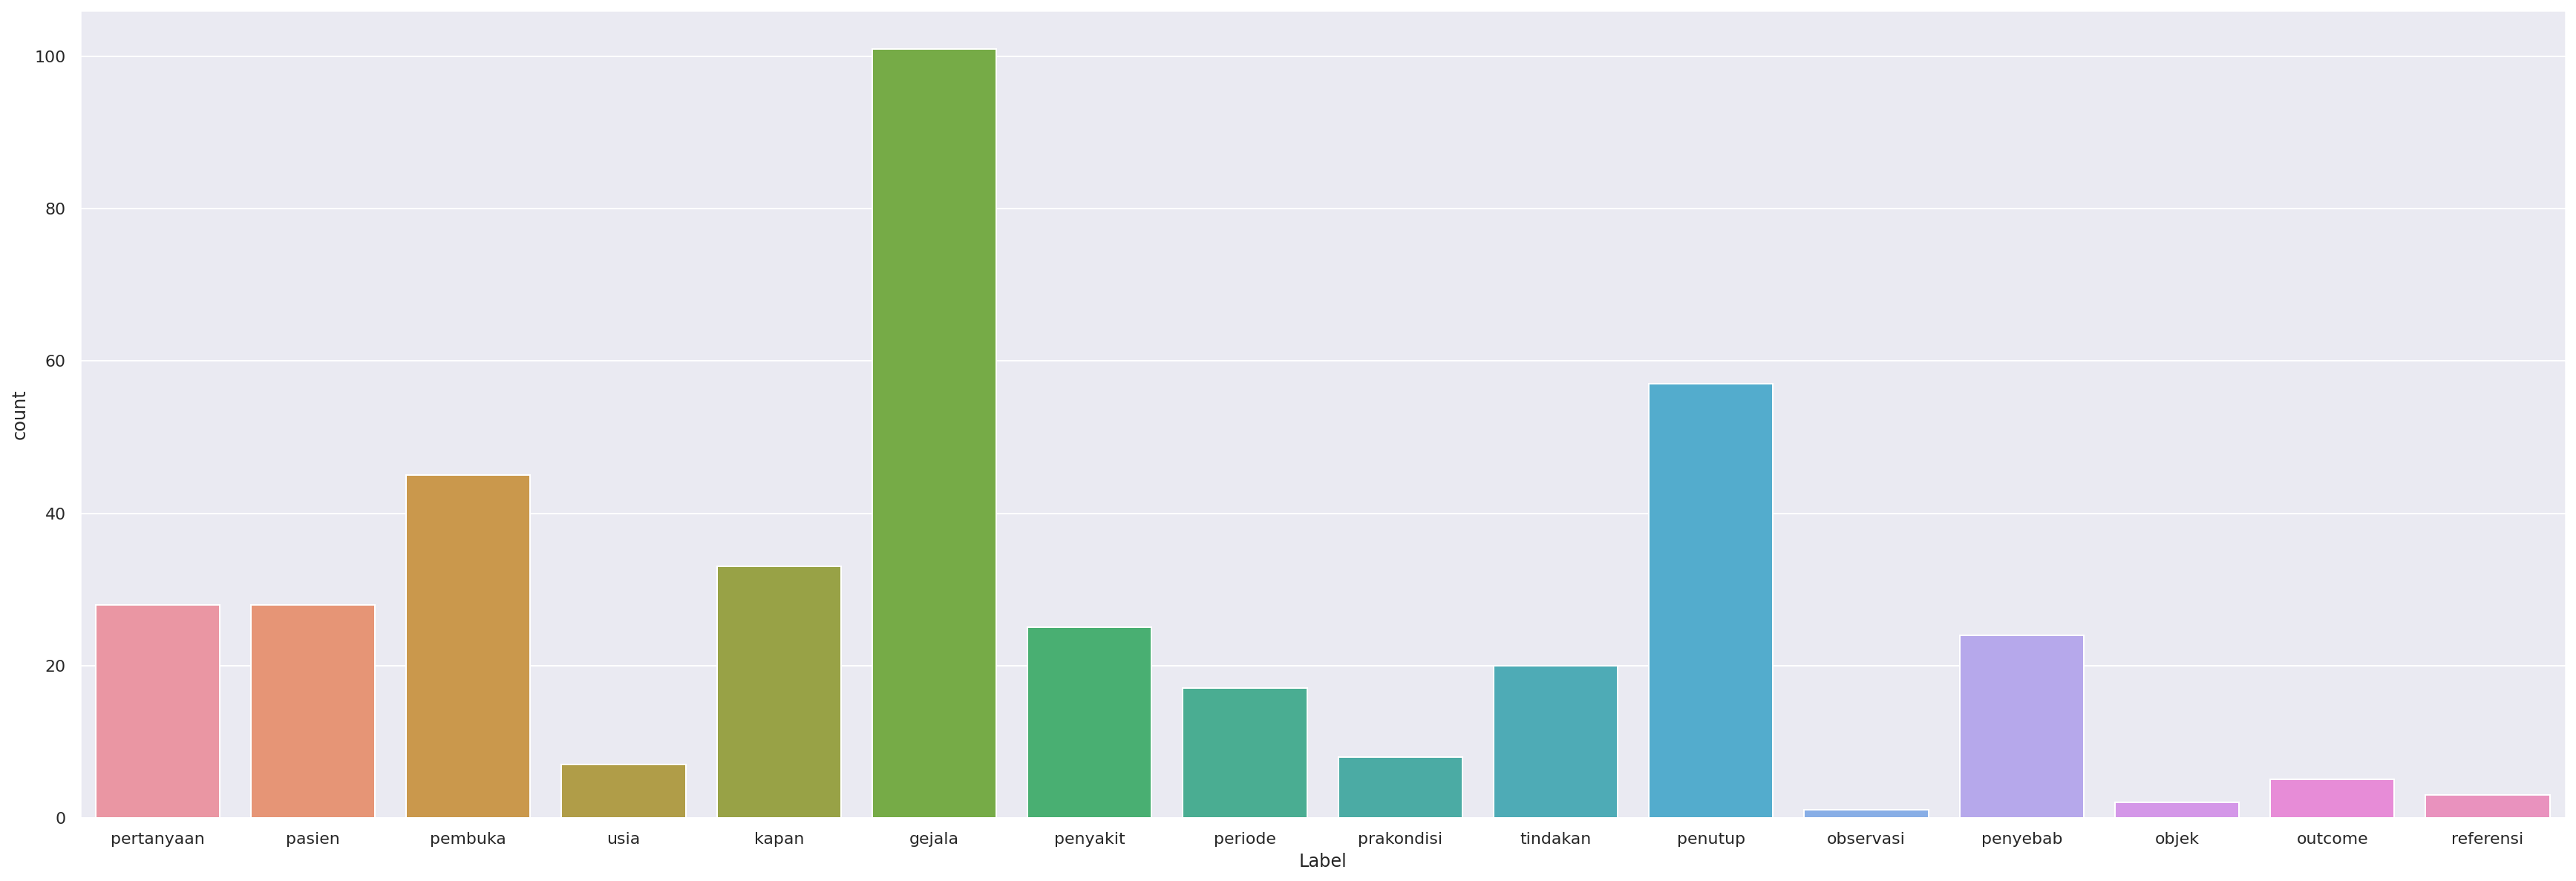

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(x="Label", data=data)

In [ ]:
df = data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

# TFID

## Model 80% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 323
Banyak data x_test  : 81
Banyak data y_train : 323
Banyak data y_test  : 81


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [ ]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

gejala        20
penutup       13
penyakit       9
pembuka        7
kapan          6
periode        5
penyebab       4
pasien         4
prakondisi     4
pertanyaan     3
tindakan       3
usia           2
outcome        1
Name: Label, dtype: int64

### MultinomialNB

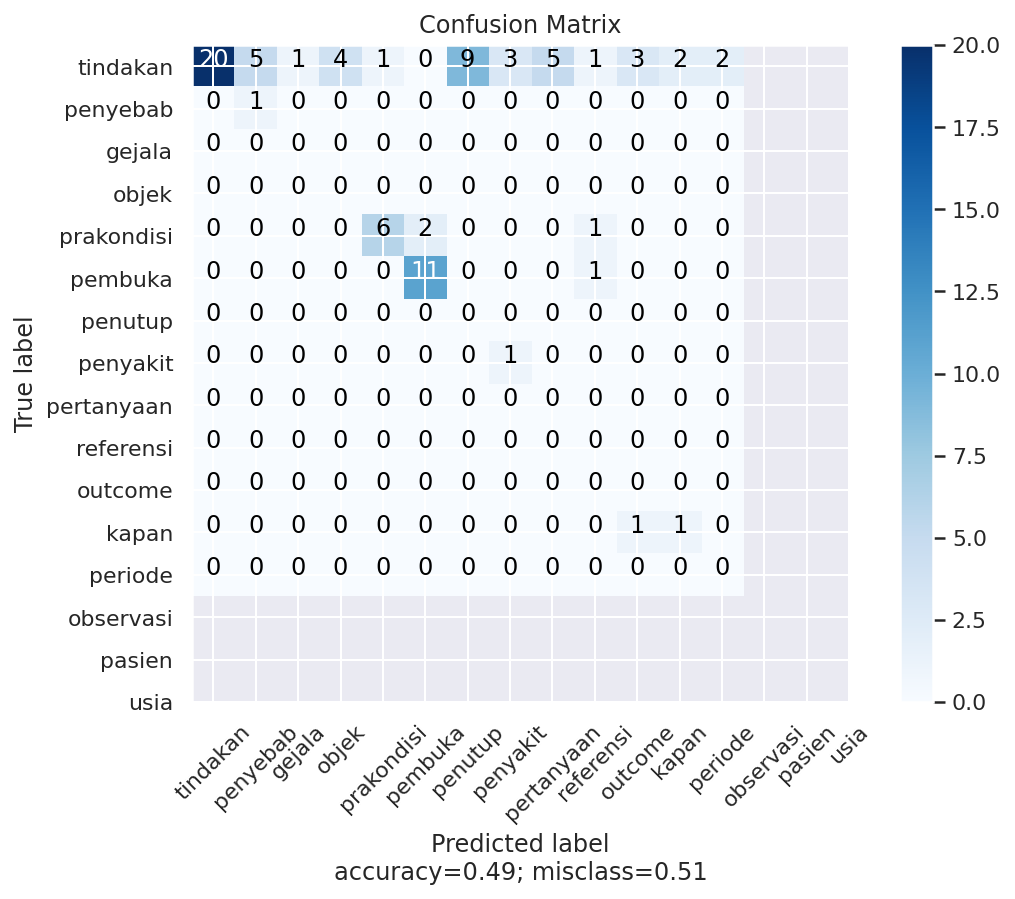

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.36      1.00      0.53        20
       kapan       1.00      0.17      0.29         6
     outcome       0.00      0.00      0.00         1
      pasien       0.00      0.00      0.00         4
     pembuka       0.67      0.86      0.75         7
     penutup       0.92      0.85      0.88        13
    penyakit       0.00      0.00      0.00         9
    penyebab       1.00      0.25      0.40         4
     periode       0.00      0.00      0.00         5
  pertanyaan       0.00      0.00      0.00         3
  prakondisi       0.00      0.00      0.00         4
    tindakan       0.50      0.33      0.40         3
        usia       0.00      0.00      0.00         2

    accuracy                           0.49        81
   macro avg       0.34      0.27      0.25        81
weighted avg       0.43      0.49      0.39        81



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.49382716049382713


### SVM, Linear SVC

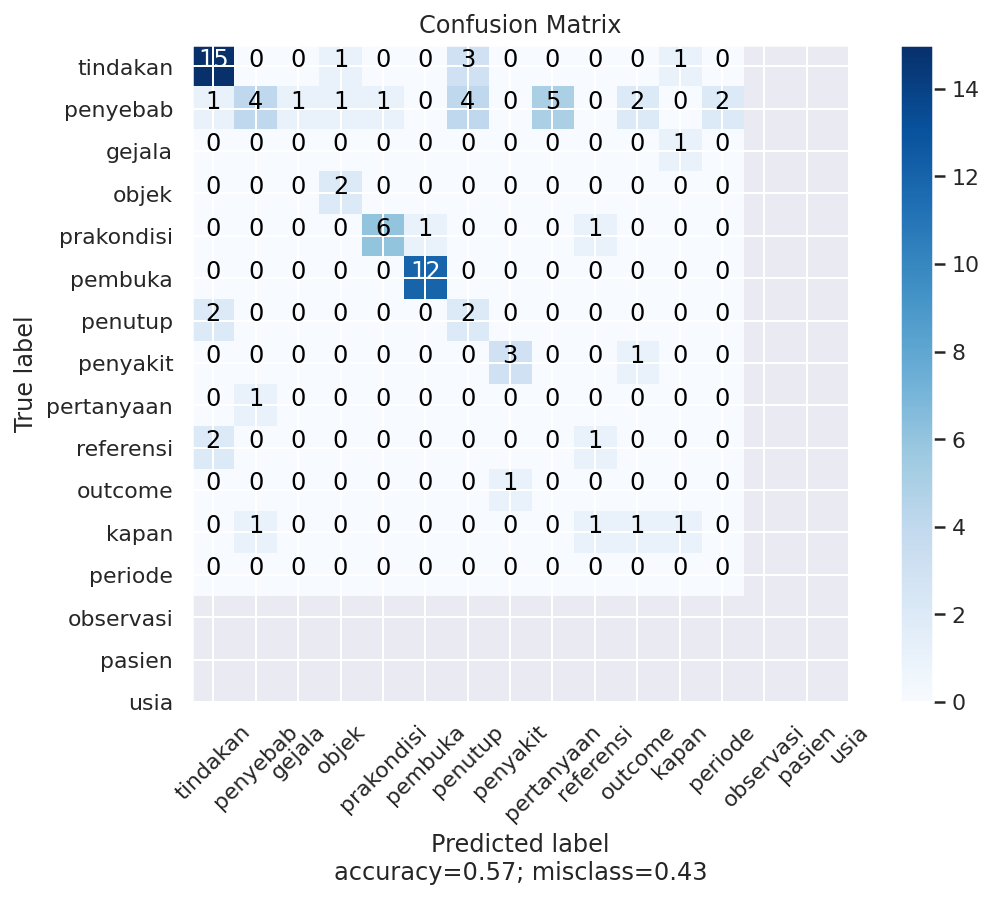

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.75      0.75      0.75        20
       kapan       0.19      0.67      0.30         6
     outcome       0.00      0.00      0.00         1
      pasien       1.00      0.50      0.67         4
     pembuka       0.75      0.86      0.80         7
     penutup       1.00      0.92      0.96        13
    penyakit       0.50      0.22      0.31         9
    penyebab       0.75      0.75      0.75         4
     periode       0.00      0.00      0.00         5
  pertanyaan       0.33      0.33      0.33         3
  prakondisi       0.00      0.00      0.00         4
    tindakan       0.25      0.33      0.29         3
        usia       0.00      0.00      0.00         2

    accuracy                           0.57        81
   macro avg       0.42      0.41      0.40        81
weighted avg       0.59      0.57      0.56        81



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil2,y_test))

0.5679012345679012


### Logistic Regression

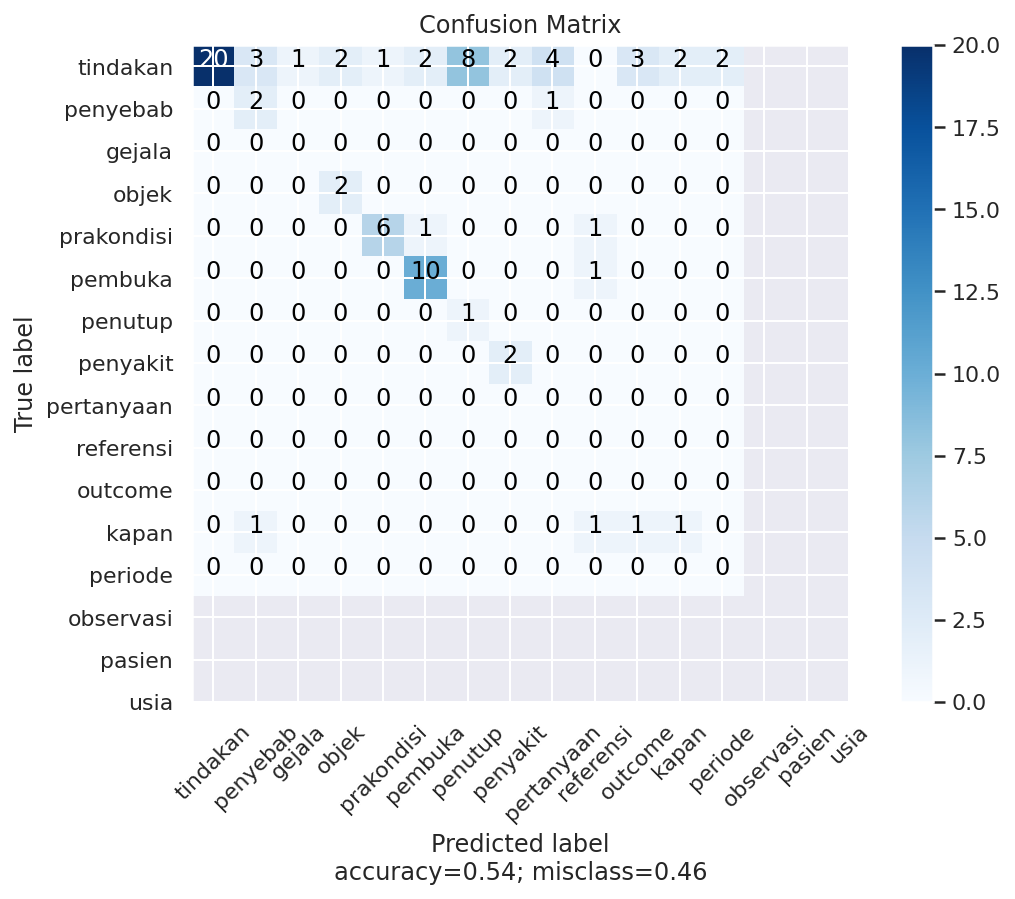

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.40      1.00      0.57        20
       kapan       0.67      0.33      0.44         6
     outcome       0.00      0.00      0.00         1
      pasien       1.00      0.50      0.67         4
     pembuka       0.75      0.86      0.80         7
     penutup       0.91      0.77      0.83        13
    penyakit       1.00      0.11      0.20         9
    penyebab       1.00      0.50      0.67         4
     periode       0.00      0.00      0.00         5
  pertanyaan       0.00      0.00      0.00         3
  prakondisi       0.00      0.00      0.00         4
    tindakan       0.25      0.33      0.29         3
        usia       0.00      0.00      0.00         2

    accuracy                           0.54        81
   macro avg       0.46      0.34      0.34        81
weighted avg       0.58      0.54      0.48        81



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.5432098765432098


## Model 70% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 282
Banyak data x_test  : 122
Banyak data y_train : 282
Banyak data y_test  : 122


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [ ]:
data

,Label,Isi,questionflag
0,pertanyaan,sakit perut kembung riwayat asam lambung atas,1
1,pasien,irwan,1
2,pembuka,hallo dok,1
3,usia,30th,1
4,kapan,,1
...,...,...,...
399,gejala,badan lemas,1
400,gejala,hidup,1
401,penutup,moga manfaat,1
402,penutup,moga manfaat,1


In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

gejala        26
penutup       18
pembuka       14
penyakit      12
kapan         11
pasien         8
periode        7
penyebab       6
prakondisi     6
pertanyaan     5
tindakan       5
usia           2
outcome        1
objek          1
Name: Label, dtype: int64

### MultinomialNB

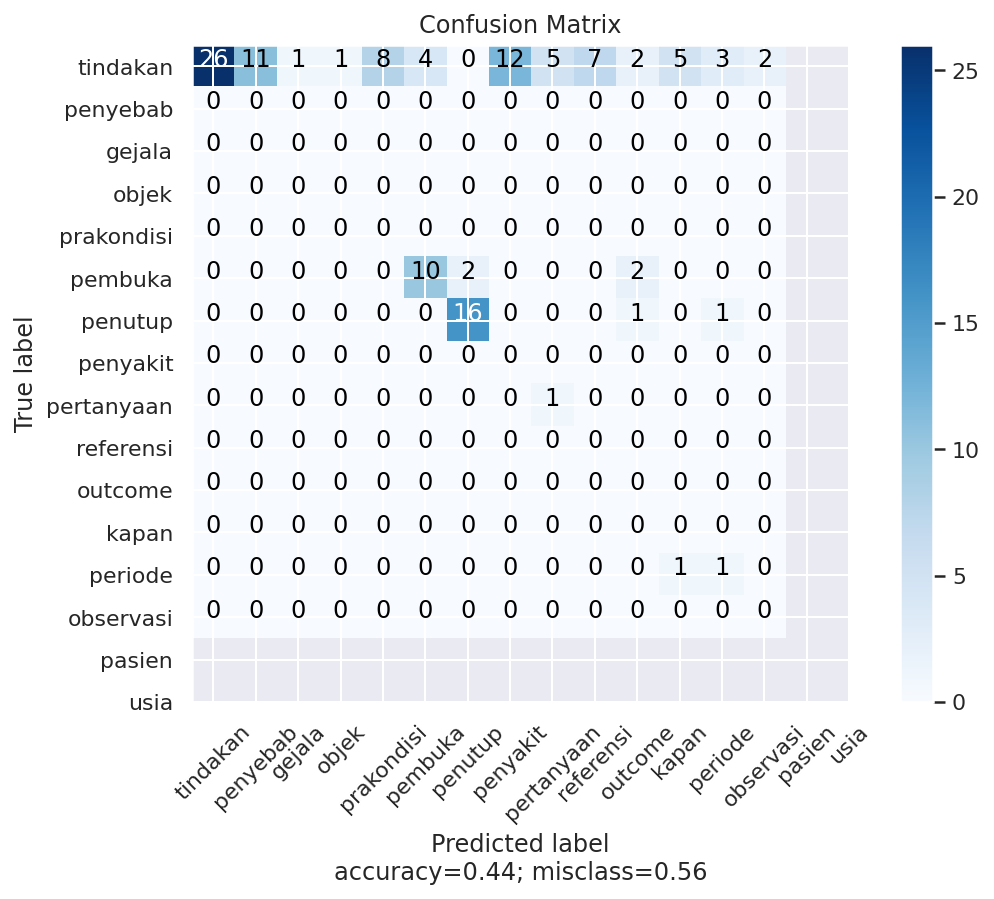

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.30      1.00      0.46        26
       kapan       0.00      0.00      0.00        11
       objek       0.00      0.00      0.00         1
     outcome       0.00      0.00      0.00         1
      pasien       0.00      0.00      0.00         8
     pembuka       0.71      0.71      0.71        14
     penutup       0.89      0.89      0.89        18
    penyakit       0.00      0.00      0.00        12
    penyebab       1.00      0.17      0.29         6
     periode       0.00      0.00      0.00         7
  pertanyaan       0.00      0.00      0.00         5
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.50      0.20      0.29         5
        usia       0.00      0.00      0.00         2

    accuracy                           0.44       122
   macro avg       0.24      0.21      0.19       122
weighted avg       0.35      0.44      0.34       122


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.4426229508196721


### SVM, Linear SVC

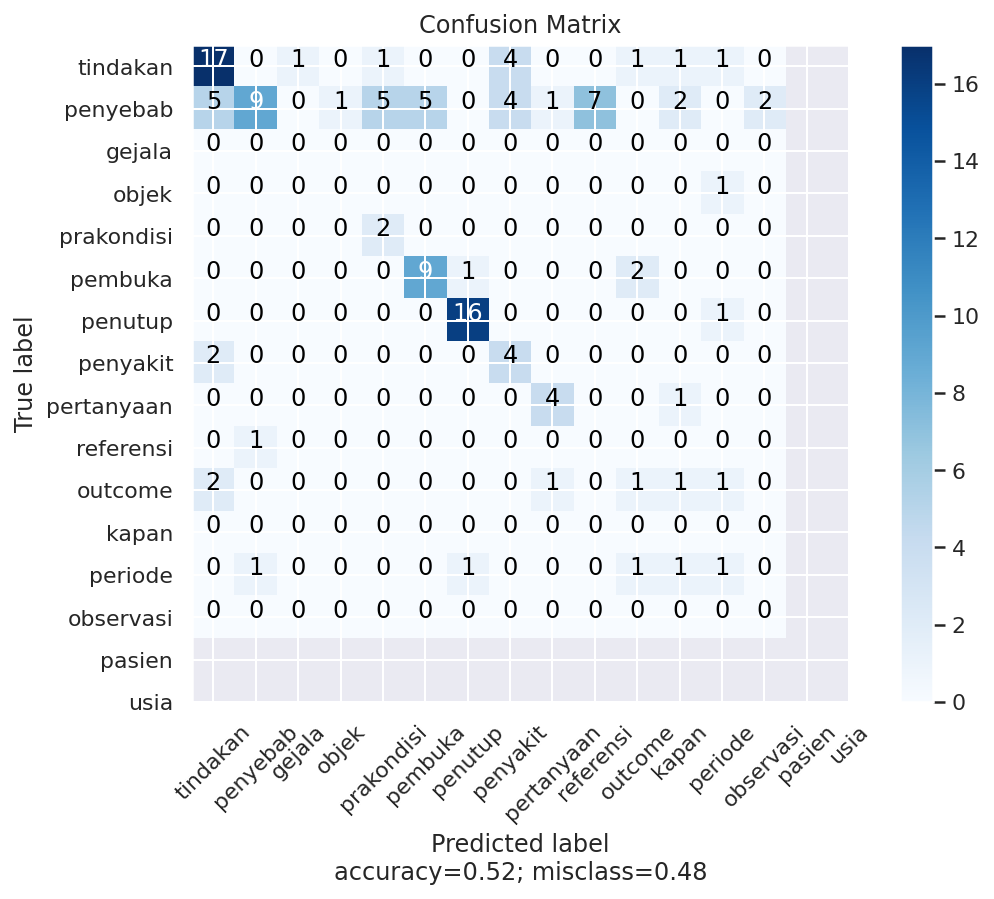

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.65      0.65      0.65        26
       kapan       0.22      0.82      0.35        11
       objek       0.00      0.00      0.00         1
     outcome       0.00      0.00      0.00         1
      pasien       1.00      0.25      0.40         8
     pembuka       0.75      0.64      0.69        14
     penutup       0.94      0.89      0.91        18
    penyakit       0.67      0.33      0.44        12
    penyebab       0.80      0.67      0.73         6
     periode       0.00      0.00      0.00         7
  pertanyaan       0.17      0.20      0.18         5
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.20      0.20      0.20         5
        usia       0.00      0.00      0.00         2

    accuracy                           0.52       122
   macro avg       0.39      0.33      0.33       122
weighted avg       0.57      0.52      0.51       122


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil2,y_test))

0.5163934426229508


### Logistic Regression

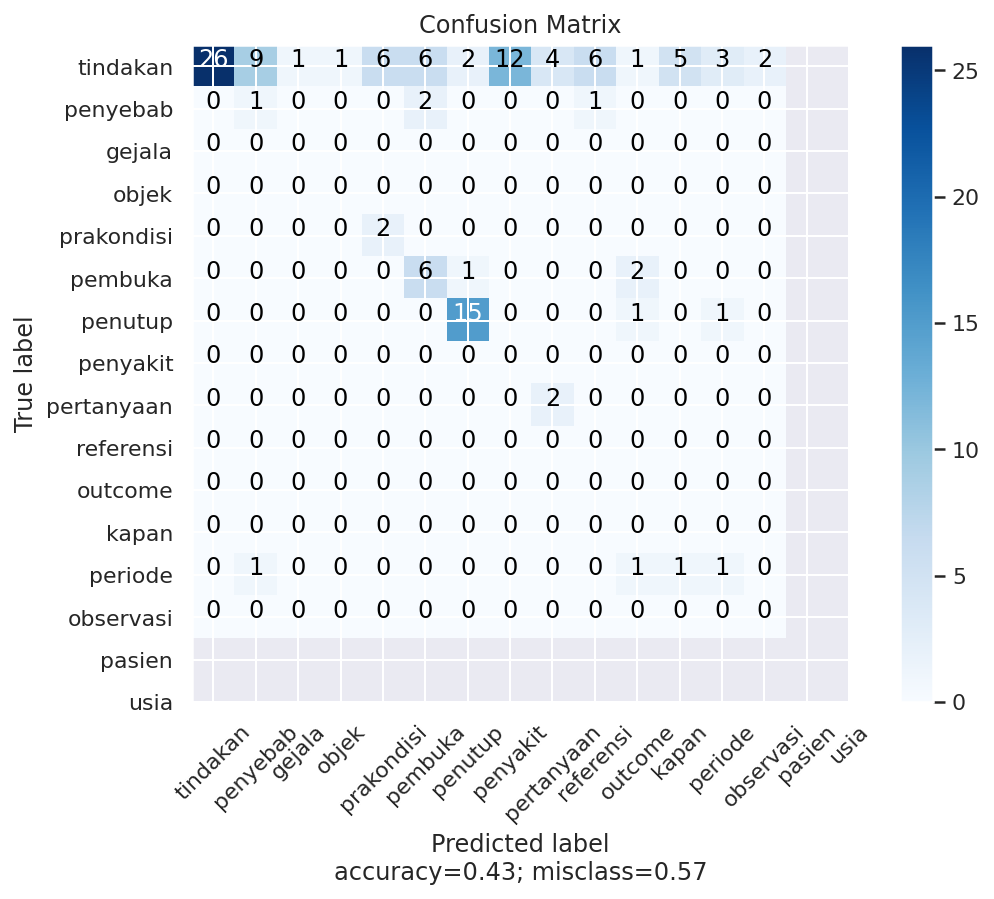

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.31      1.00      0.47        26
       kapan       0.25      0.09      0.13        11
       objek       0.00      0.00      0.00         1
     outcome       0.00      0.00      0.00         1
      pasien       1.00      0.25      0.40         8
     pembuka       0.67      0.43      0.52        14
     penutup       0.88      0.83      0.86        18
    penyakit       0.00      0.00      0.00        12
    penyebab       1.00      0.33      0.50         6
     periode       0.00      0.00      0.00         7
  pertanyaan       0.00      0.00      0.00         5
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.25      0.20      0.22         5
        usia       0.00      0.00      0.00         2

    accuracy                           0.43       122
   macro avg       0.31      0.22      0.22       122
weighted avg       0.42      0.43      0.36       122


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.4344262295081967


## Model 50% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 202
Banyak data x_test  : 202
Banyak data y_train : 202
Banyak data y_test  : 202


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])

In [ ]:
data

,Label,Isi,questionflag
0,pertanyaan,sakit perut kembung riwayat asam lambung atas,1
1,pasien,irwan,1
2,pembuka,hallo dok,1
3,usia,30th,1
4,kapan,,1
...,...,...,...
399,gejala,badan lemas,1
400,gejala,hidup,1
401,penutup,moga manfaat,1
402,penutup,moga manfaat,1


In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

gejala        51
penutup       32
pembuka       23
penyakit      16
kapan         16
pasien        14
pertanyaan    12
penyebab      12
periode        8
tindakan       7
prakondisi     6
usia           3
outcome        1
objek          1
Name: Label, dtype: int64

### MultinomialNB

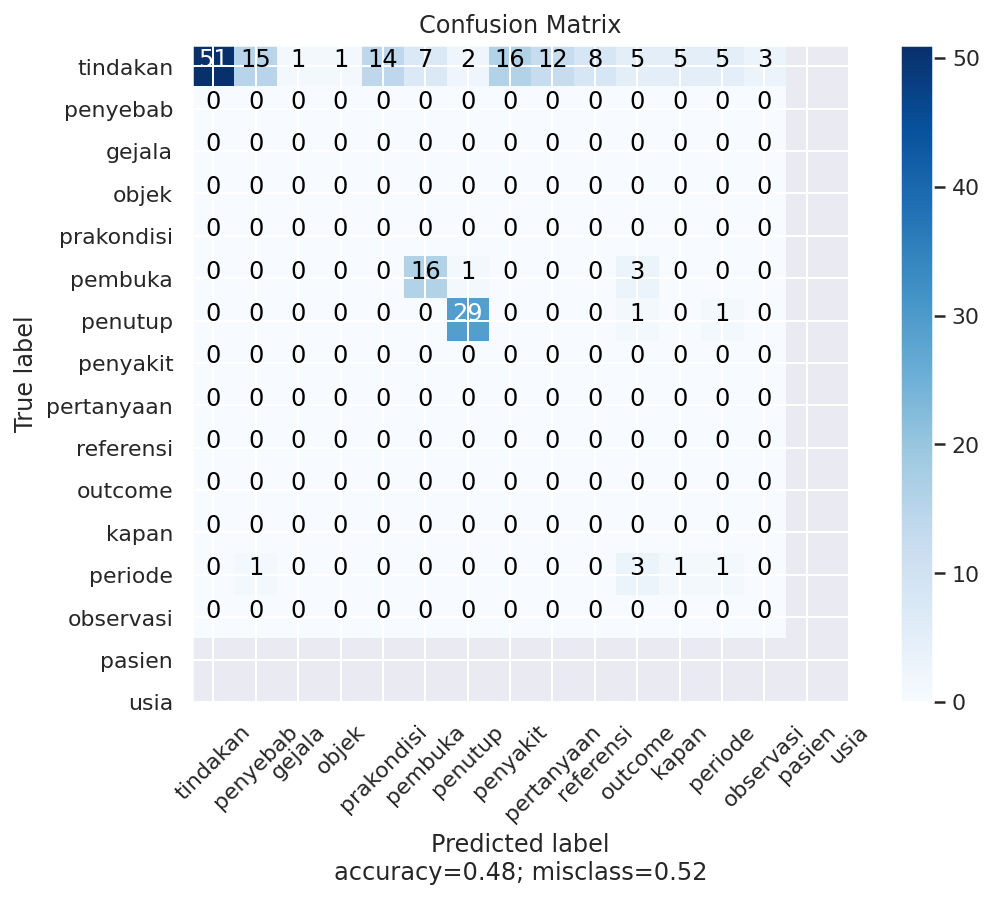

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.35      1.00      0.52        51
       kapan       0.00      0.00      0.00        16
       objek       0.00      0.00      0.00         1
     outcome       0.00      0.00      0.00         1
      pasien       0.00      0.00      0.00        14
     pembuka       0.80      0.70      0.74        23
     penutup       0.94      0.91      0.92        32
    penyakit       0.00      0.00      0.00        16
    penyebab       0.00      0.00      0.00        12
     periode       0.00      0.00      0.00         8
  pertanyaan       0.00      0.00      0.00        12
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.17      0.14      0.15         7
        usia       0.00      0.00      0.00         3

    accuracy                           0.48       202
   macro avg       0.16      0.20      0.17       202
weighted avg       0.33      0.48      0.37       202


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.4801980198019802


### SVM, Linear SVC

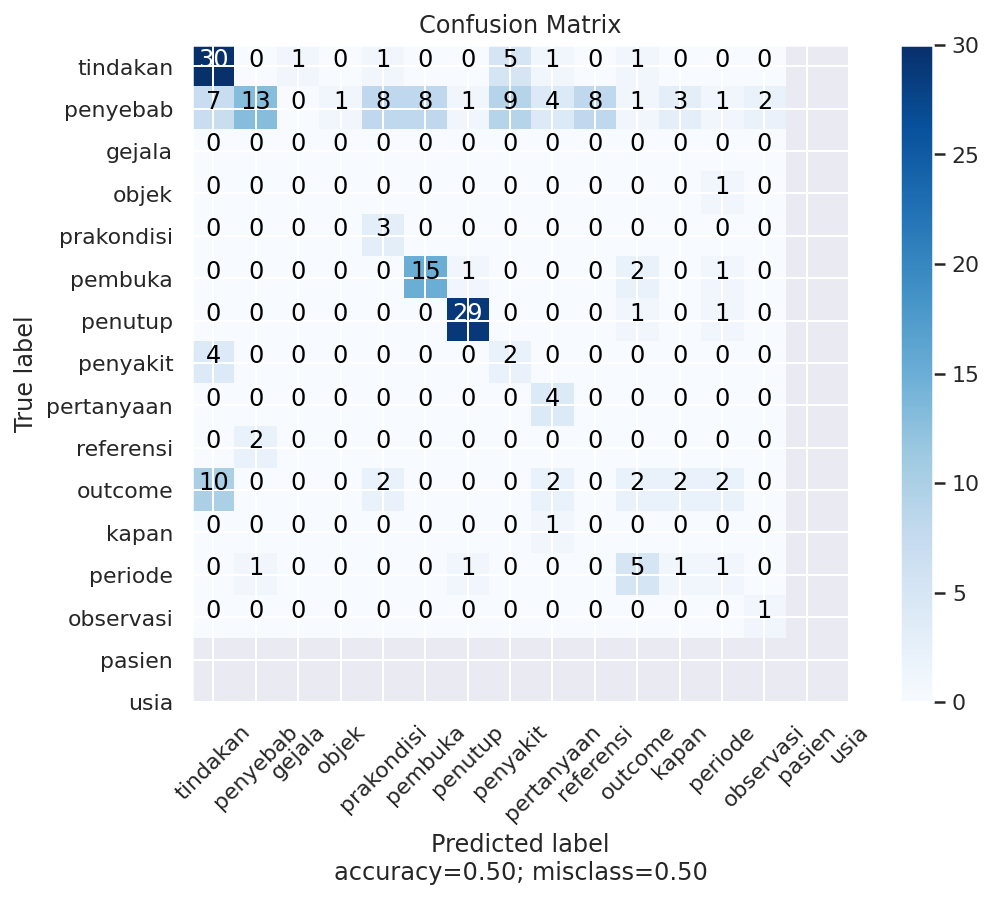

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.77      0.59      0.67        51
       kapan       0.20      0.81      0.32        16
       objek       0.00      0.00      0.00         1
     outcome       0.00      0.00      0.00         1
      pasien       1.00      0.21      0.35        14
     pembuka       0.79      0.65      0.71        23
     penutup       0.94      0.91      0.92        32
    penyakit       0.33      0.12      0.18        16
    penyebab       1.00      0.33      0.50        12
     periode       0.00      0.00      0.00         8
  pertanyaan       0.10      0.17      0.12        12
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.11      0.14      0.12         7
        usia       1.00      0.33      0.50         3

    accuracy                           0.50       202
   macro avg       0.45      0.31      0.31       202
weighted avg       0.63      0.50      0.51       202


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil2,y_test))

0.49504950495049505


### Logistic Regression

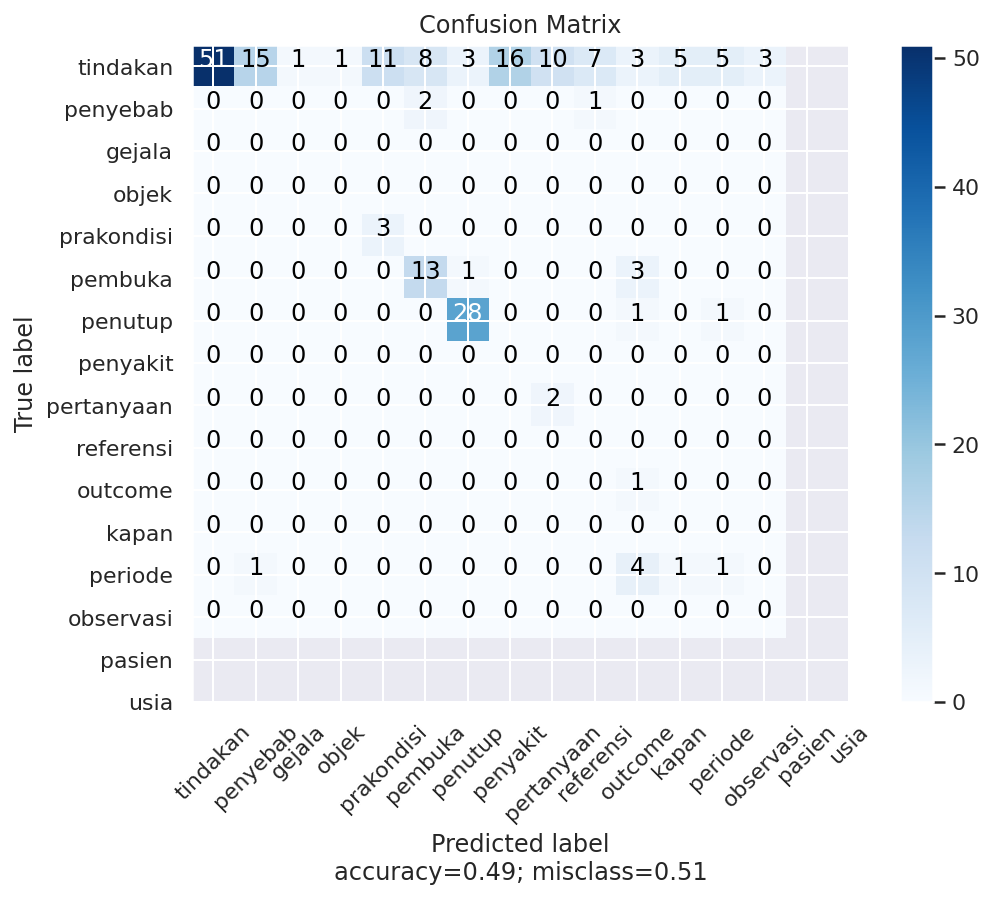

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.37      1.00      0.54        51
       kapan       0.00      0.00      0.00        16
       objek       0.00      0.00      0.00         1
     outcome       0.00      0.00      0.00         1
      pasien       1.00      0.21      0.35        14
     pembuka       0.76      0.57      0.65        23
     penutup       0.93      0.88      0.90        32
    penyakit       0.00      0.00      0.00        16
    penyebab       1.00      0.17      0.29        12
     periode       0.00      0.00      0.00         8
  pertanyaan       1.00      0.08      0.15        12
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.14      0.14      0.14         7
        usia       0.00      0.00      0.00         3

    accuracy                           0.49       202
   macro avg       0.37      0.22      0.22       202
weighted avg       0.52      0.49      0.41       202


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.4900990099009901


# TF

## Model 80% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 323
Banyak data x_test  : 81
Banyak data y_train : 323
Banyak data y_test  : 81


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [ ]:
model= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf3)])

In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

gejala        20
penutup       13
penyakit       9
pembuka        7
kapan          6
periode        5
penyebab       4
pasien         4
prakondisi     4
pertanyaan     3
tindakan       3
usia           2
outcome        1
Name: Label, dtype: int64

### MultinomialNB

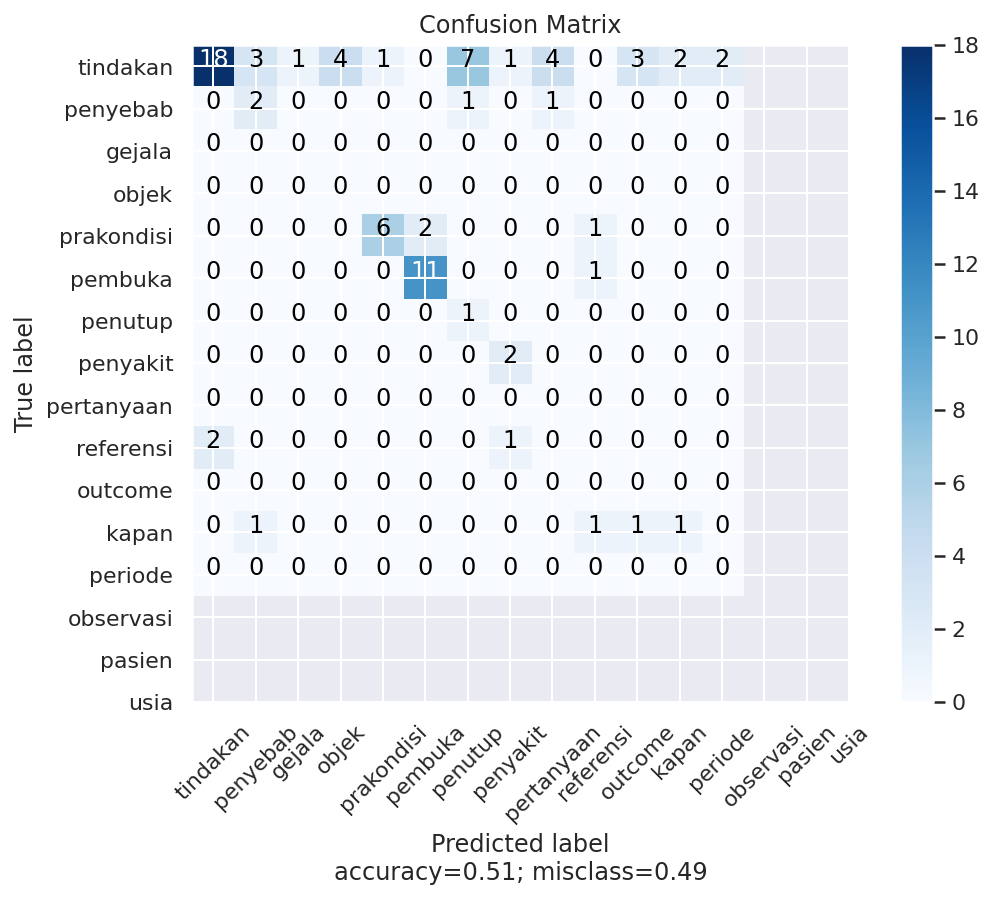

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.39      0.90      0.55        20
       kapan       0.50      0.33      0.40         6
     outcome       0.00      0.00      0.00         1
      pasien       0.00      0.00      0.00         4
     pembuka       0.67      0.86      0.75         7
     penutup       0.92      0.85      0.88        13
    penyakit       1.00      0.11      0.20         9
    penyebab       1.00      0.50      0.67         4
     periode       0.00      0.00      0.00         5
  pertanyaan       0.00      0.00      0.00         3
  prakondisi       0.00      0.00      0.00         4
    tindakan       0.25      0.33      0.29         3
        usia       0.00      0.00      0.00         2

    accuracy                           0.51        81
   macro avg       0.36      0.30      0.29        81
weighted avg       0.51      0.51      0.44        81



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.5061728395061729


### SVM, Linear SVC

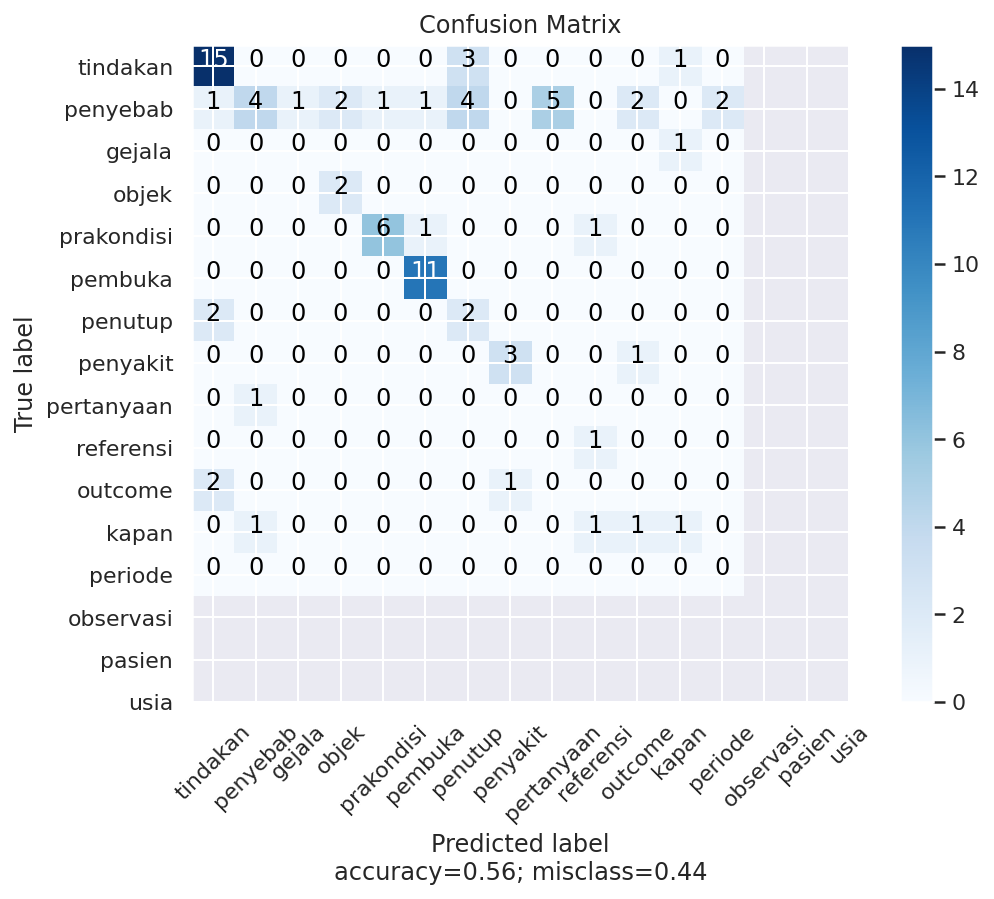

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.79      0.75      0.77        20
       kapan       0.17      0.67      0.28         6
     outcome       0.00      0.00      0.00         1
      pasien       1.00      0.50      0.67         4
     pembuka       0.75      0.86      0.80         7
     penutup       1.00      0.85      0.92        13
    penyakit       0.50      0.22      0.31         9
    penyebab       0.75      0.75      0.75         4
     periode       0.00      0.00      0.00         5
  pertanyaan       1.00      0.33      0.50         3
  prakondisi       0.00      0.00      0.00         4
    tindakan       0.25      0.33      0.29         3
        usia       0.00      0.00      0.00         2

    accuracy                           0.56        81
   macro avg       0.48      0.40      0.41        81
weighted avg       0.62      0.56      0.56        81



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil2,y_test))

0.5555555555555556


### Logistic Regression

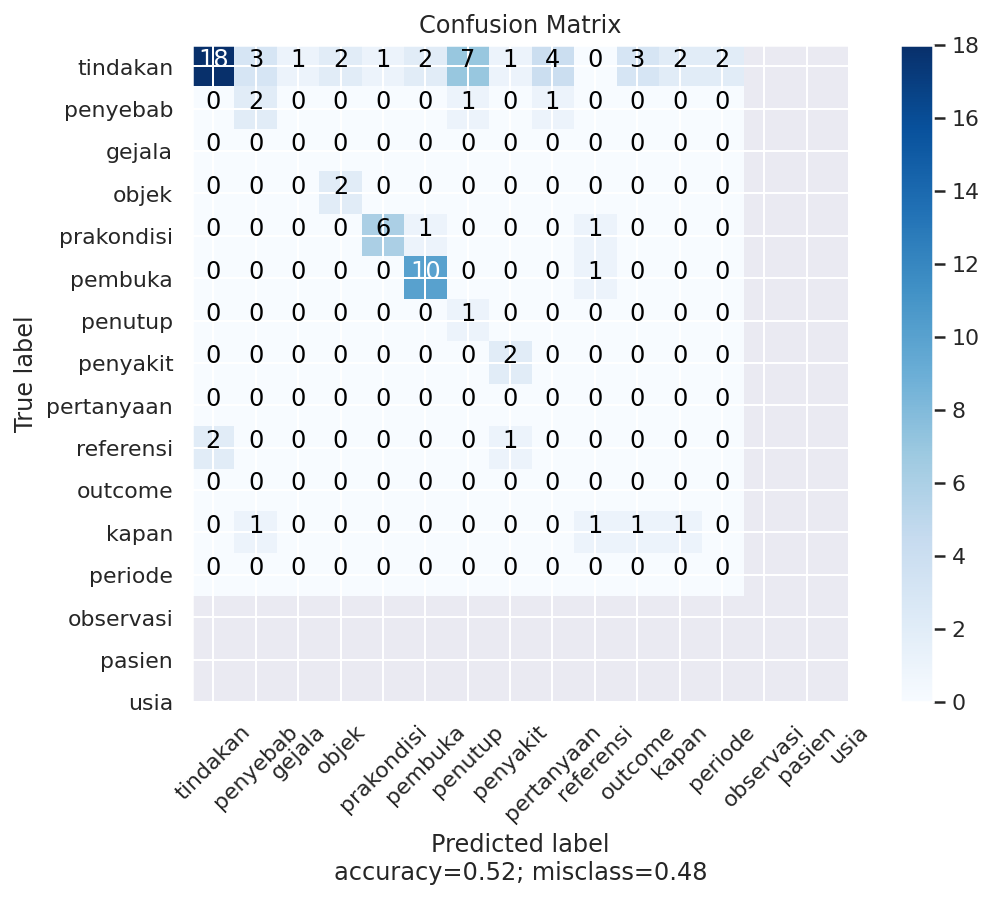

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.39      0.90      0.55        20
       kapan       0.50      0.33      0.40         6
     outcome       0.00      0.00      0.00         1
      pasien       1.00      0.50      0.67         4
     pembuka       0.75      0.86      0.80         7
     penutup       0.91      0.77      0.83        13
    penyakit       1.00      0.11      0.20         9
    penyebab       1.00      0.50      0.67         4
     periode       0.00      0.00      0.00         5
  pertanyaan       0.00      0.00      0.00         3
  prakondisi       0.00      0.00      0.00         4
    tindakan       0.25      0.33      0.29         3
        usia       0.00      0.00      0.00         2

    accuracy                           0.52        81
   macro avg       0.45      0.33      0.34        81
weighted avg       0.56      0.52      0.47        81



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.5185185185185185


## Model 70% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 282
Banyak data x_test  : 122
Banyak data y_train : 282
Banyak data y_test  : 122


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf3)])

In [ ]:
data

,Label,Isi,questionflag
0,pertanyaan,sakit perut kembung riwayat asam lambung atas,1
1,pasien,irwan,1
2,pembuka,hallo dok,1
3,usia,30th,1
4,kapan,,1
...,...,...,...
399,gejala,badan lemas,1
400,gejala,hidup,1
401,penutup,moga manfaat,1
402,penutup,moga manfaat,1


In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

gejala        26
penutup       18
pembuka       14
penyakit      12
kapan         11
pasien         8
periode        7
penyebab       6
prakondisi     6
pertanyaan     5
tindakan       5
usia           2
outcome        1
objek          1
Name: Label, dtype: int64

### MultinomialNB

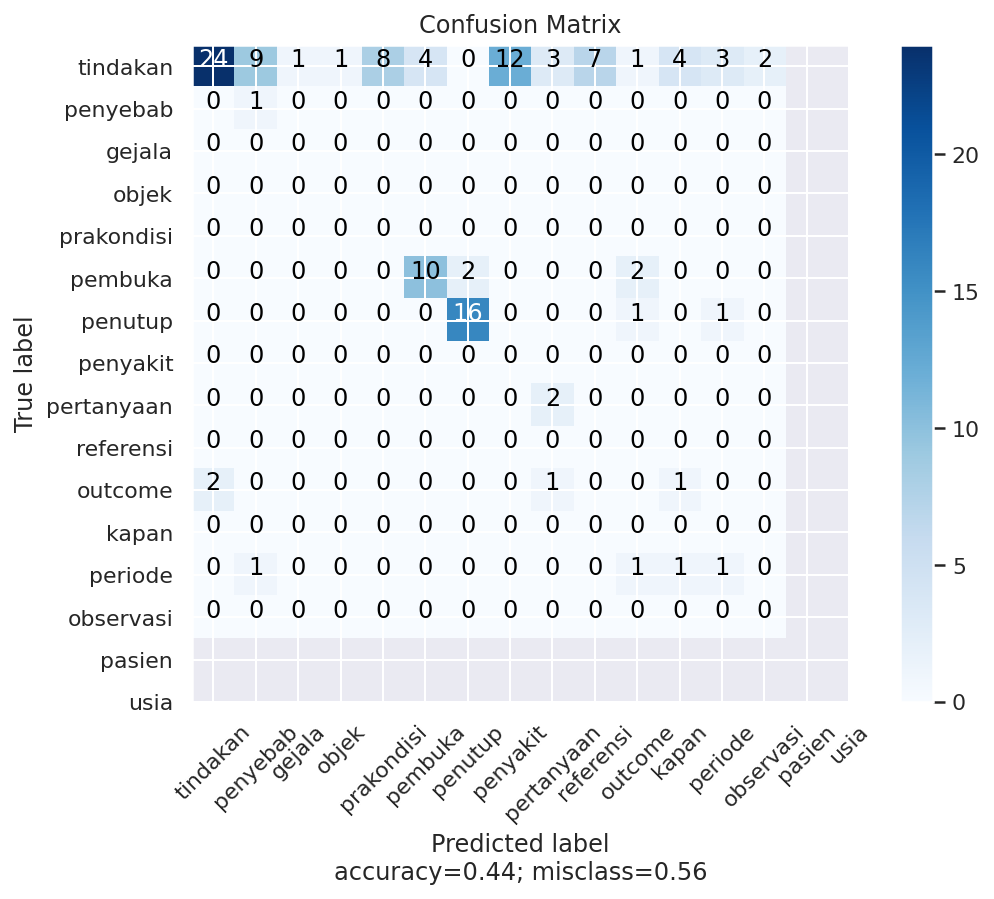

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.30      0.92      0.46        26
       kapan       1.00      0.09      0.17        11
       objek       0.00      0.00      0.00         1
     outcome       0.00      0.00      0.00         1
      pasien       0.00      0.00      0.00         8
     pembuka       0.71      0.71      0.71        14
     penutup       0.89      0.89      0.89        18
    penyakit       0.00      0.00      0.00        12
    penyebab       1.00      0.33      0.50         6
     periode       0.00      0.00      0.00         7
  pertanyaan       0.00      0.00      0.00         5
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.25      0.20      0.22         5
        usia       0.00      0.00      0.00         2

    accuracy                           0.44       122
   macro avg       0.30      0.23      0.21       122
weighted avg       0.43      0.44      0.36       122


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.4426229508196721


### SVM, Linear SVC

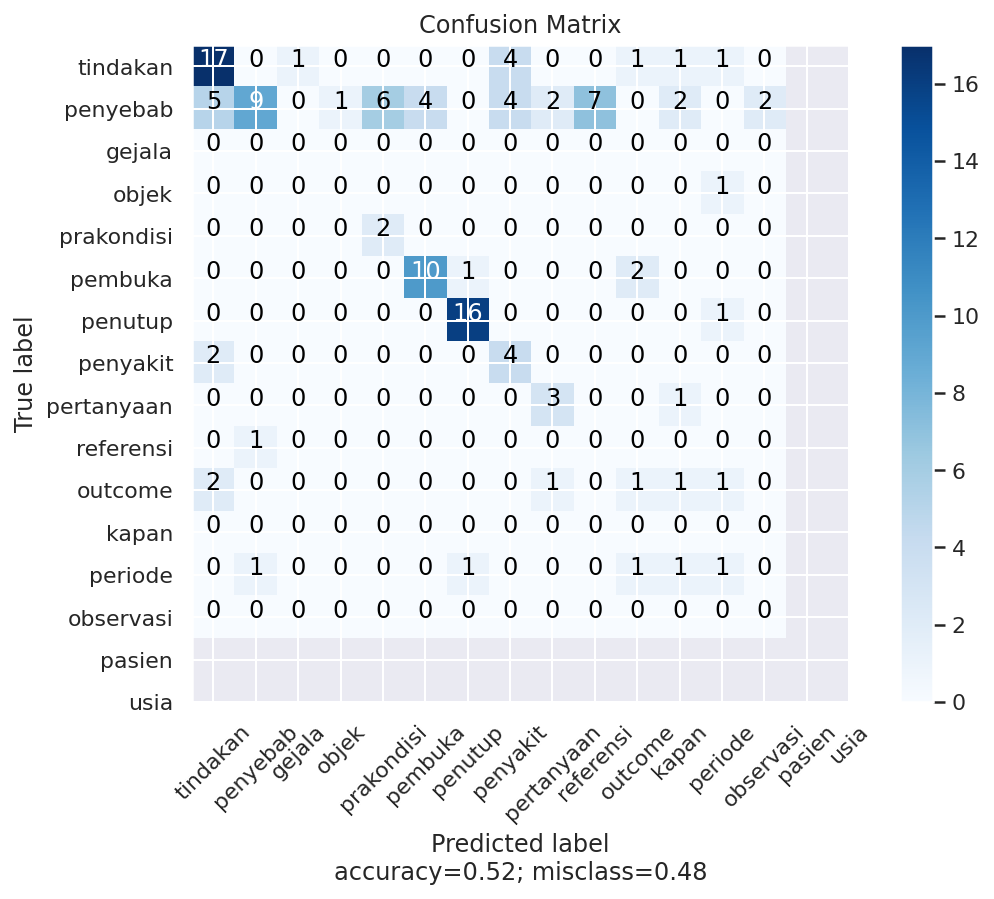

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.68      0.65      0.67        26
       kapan       0.21      0.82      0.34        11
       objek       0.00      0.00      0.00         1
     outcome       0.00      0.00      0.00         1
      pasien       1.00      0.25      0.40         8
     pembuka       0.77      0.71      0.74        14
     penutup       0.94      0.89      0.91        18
    penyakit       0.67      0.33      0.44        12
    penyebab       0.75      0.50      0.60         6
     periode       0.00      0.00      0.00         7
  pertanyaan       0.17      0.20      0.18         5
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.20      0.20      0.20         5
        usia       0.00      0.00      0.00         2

    accuracy                           0.52       122
   macro avg       0.38      0.33      0.32       122
weighted avg       0.57      0.52      0.51       122


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil2,y_test))

0.5163934426229508


### Logistic Regression

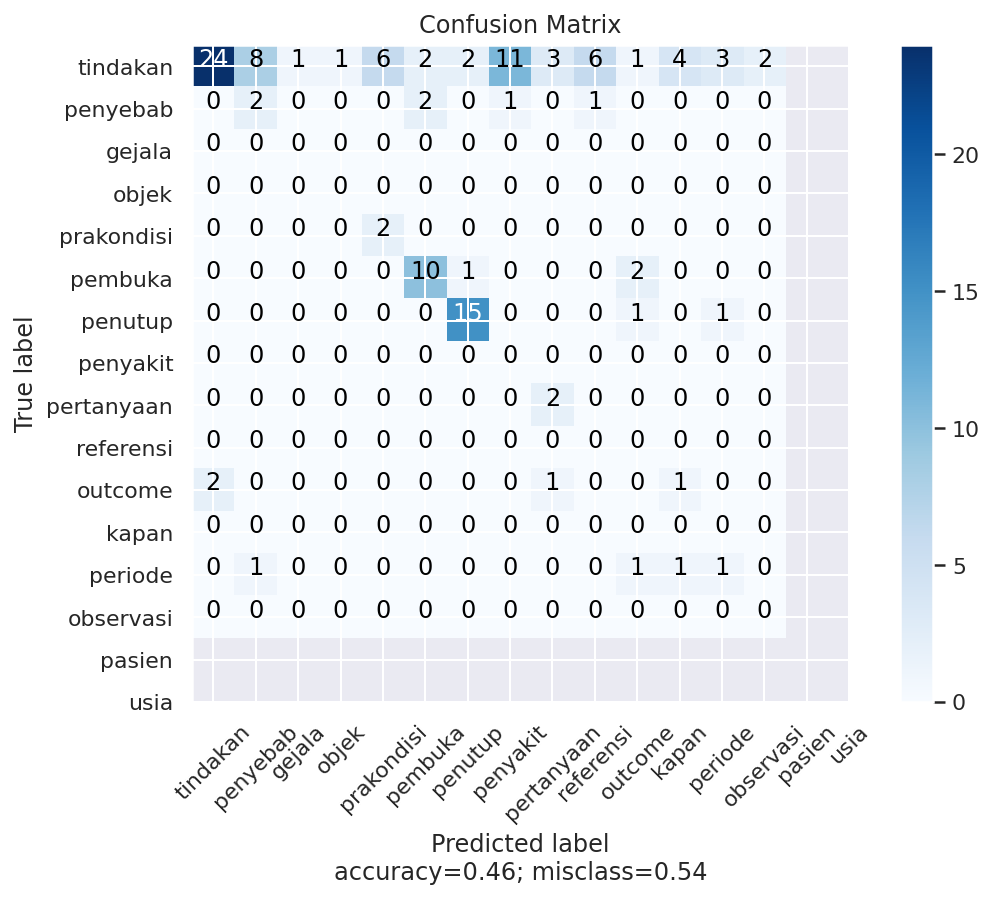

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.32      0.92      0.48        26
       kapan       0.33      0.18      0.24        11
       objek       0.00      0.00      0.00         1
     outcome       0.00      0.00      0.00         1
      pasien       1.00      0.25      0.40         8
     pembuka       0.77      0.71      0.74        14
     penutup       0.88      0.83      0.86        18
    penyakit       0.00      0.00      0.00        12
    penyebab       1.00      0.33      0.50         6
     periode       0.00      0.00      0.00         7
  pertanyaan       0.00      0.00      0.00         5
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.25      0.20      0.22         5
        usia       0.00      0.00      0.00         2

    accuracy                           0.46       122
   macro avg       0.33      0.25      0.25       122
weighted avg       0.44      0.46      0.39       122


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.45901639344262296


## Model 50% Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=data.Isi
y=data.Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50, random_state=400)

In [ ]:
print('Banyak data x_train :',len(X_train))
print('Banyak data x_test  :',len(X_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 202
Banyak data x_test  : 202
Banyak data y_train : 202
Banyak data y_test  : 202


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [ ]:
clf1 = MultinomialNB()
clf2 = LinearSVC()
clf3 = LogisticRegression()

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',cvec)
                 ,('classifier',clf3)])

In [ ]:
data

,Label,Isi,questionflag
0,pertanyaan,sakit perut kembung riwayat asam lambung atas,1
1,pasien,irwan,1
2,pembuka,hallo dok,1
3,usia,30th,1
4,kapan,,1
...,...,...,...
399,gejala,badan lemas,1
400,gejala,hidup,1
401,penutup,moga manfaat,1
402,penutup,moga manfaat,1


In [ ]:
model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [ ]:
hasil=model.predict(X_test)
hasil2=model2.predict(X_test)
hasil3=model3.predict(X_test)

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()

In [ ]:
y_test.value_counts()

gejala        51
penutup       32
pembuka       23
penyakit      16
kapan         16
pasien        14
pertanyaan    12
penyebab      12
periode        8
tindakan       7
prakondisi     6
usia           3
outcome        1
objek          1
Name: Label, dtype: int64

### MultinomialNB

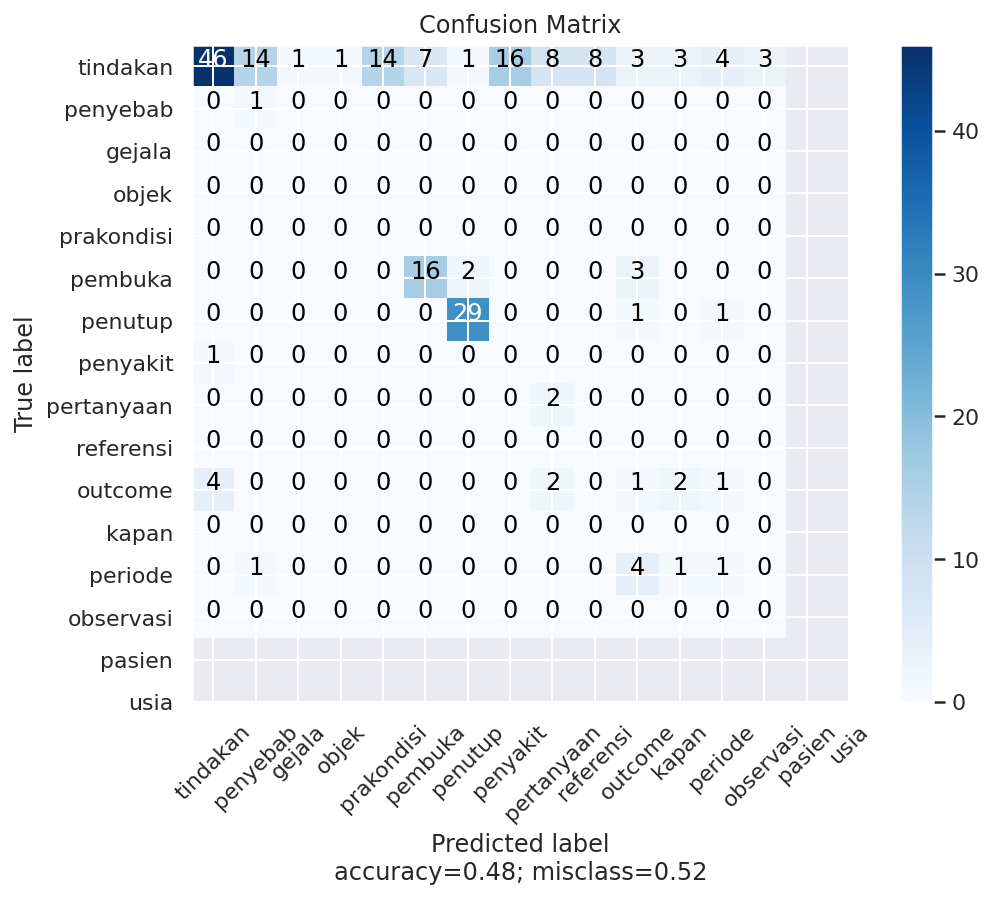

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.36      0.90      0.51        51
       kapan       1.00      0.06      0.12        16
       objek       0.00      0.00      0.00         1
     outcome       0.00      0.00      0.00         1
      pasien       0.00      0.00      0.00        14
     pembuka       0.76      0.70      0.73        23
     penutup       0.94      0.91      0.92        32
    penyakit       0.00      0.00      0.00        16
    penyebab       1.00      0.17      0.29        12
     periode       0.00      0.00      0.00         8
  pertanyaan       0.10      0.08      0.09        12
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.14      0.14      0.14         7
        usia       0.00      0.00      0.00         3

    accuracy                           0.48       202
   macro avg       0.31      0.21      0.20       202
weighted avg       0.47      0.48      0.39       202


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil,y_test))

0.4752475247524752


### SVM, Linear SVC

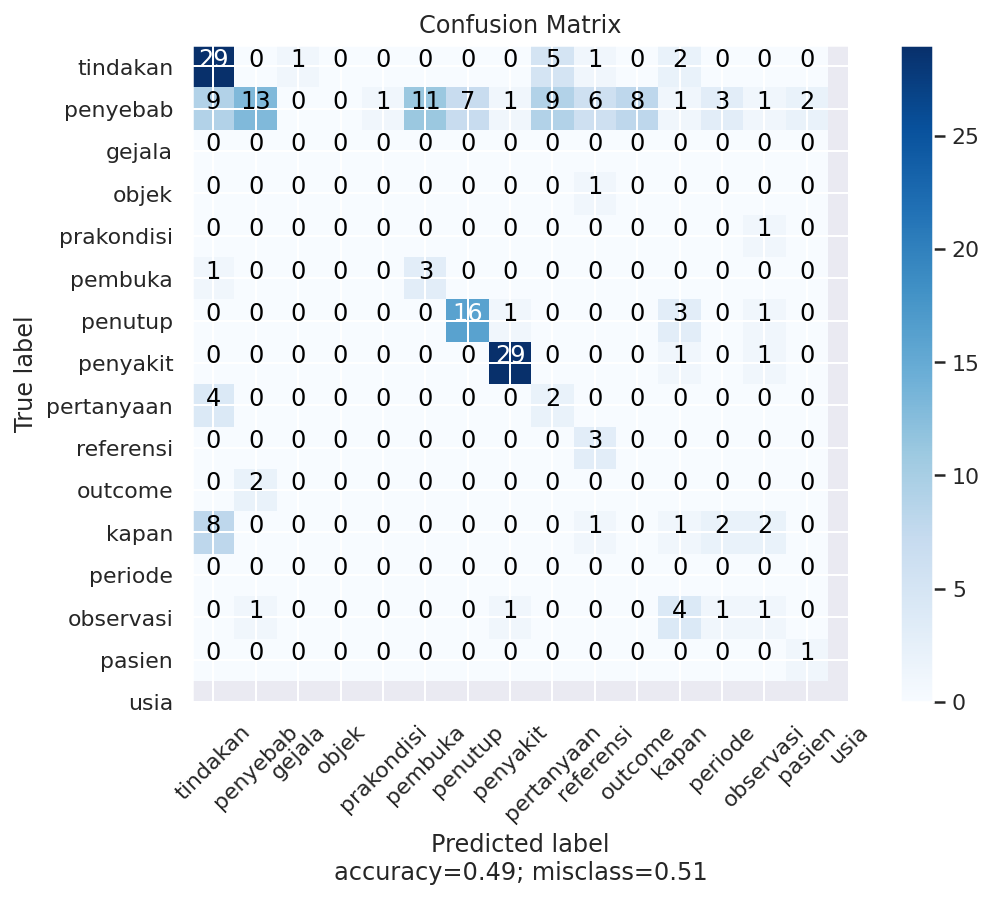

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.76      0.57      0.65        51
       kapan       0.18      0.81      0.30        16
       objek       0.00      0.00      0.00         1
   observasi       0.00      0.00      0.00         0
     outcome       0.00      0.00      0.00         1
      pasien       0.75      0.21      0.33        14
     pembuka       0.76      0.70      0.73        23
     penutup       0.94      0.91      0.92        32
    penyakit       0.33      0.12      0.18        16
    penyebab       1.00      0.25      0.40        12
     periode       0.00      0.00      0.00         8
  pertanyaan       0.07      0.08      0.08        12
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.12      0.14      0.13         7
        usia       1.00      0.33      0.50         3

    accuracy                           0.49       202
   macro avg       0.39      0.28      0.28       202


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
print(accuracy_score(hasil2,y_test))

0.48514851485148514


### Logistic Regression

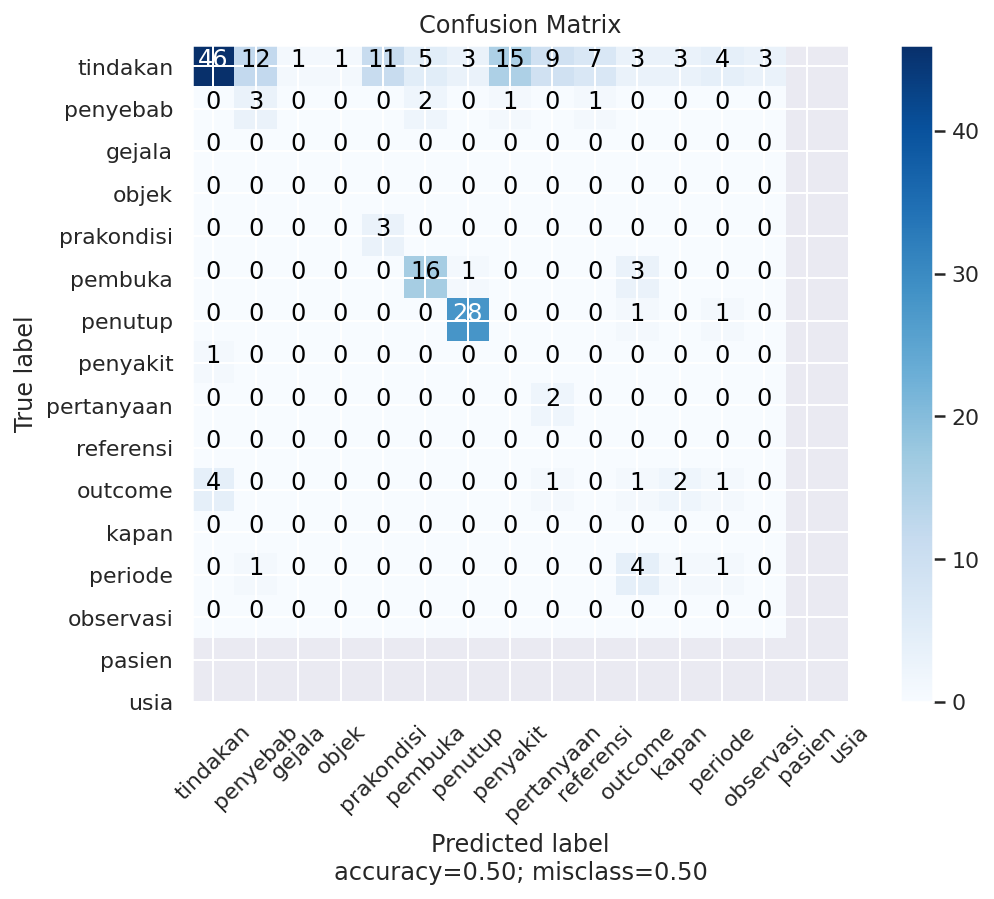

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['tindakan','penyebab','gejala','objek','prakondisi','pembuka','penutup','penyakit','pertanyaan','referensi','outcome','kapan','periode','observasi','pasien','usia'],
                      title        = "Confusion Matrix")

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

      gejala       0.37      0.90      0.53        51
       kapan       0.43      0.19      0.26        16
       objek       0.00      0.00      0.00         1
     outcome       0.00      0.00      0.00         1
      pasien       1.00      0.21      0.35        14
     pembuka       0.80      0.70      0.74        23
     penutup       0.93      0.88      0.90        32
    penyakit       0.00      0.00      0.00        16
    penyebab       1.00      0.17      0.29        12
     periode       0.00      0.00      0.00         8
  pertanyaan       0.11      0.08      0.10        12
  prakondisi       0.00      0.00      0.00         6
    tindakan       0.14      0.14      0.14         7
        usia       0.00      0.00      0.00         3

    accuracy                           0.50       202
   macro avg       0.34      0.23      0.24       202
weighted avg       0.51      0.50      0.43       202


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(accuracy_score(hasil3,y_test))

0.49504950495049505
